# <center> **Siniestros Viales**

Se lleva a cabo una revisión detallada de los datos con el propósito de identificar tendencias que puedan ofrecer información relevante para la toma de decisiones orientadas a la reducción de víctimas mortales.

## Importaciones

In [179]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#  ETL  (Extraer, Transformar y Cargar) Pestaña HECHOS

## Extraccion de la informacion

Se extraen los datos desde el archivo 'homicidios.xlsx' pestaña HECHOS

In [180]:
data = pd.read_excel('homicidios.xlsx')
data.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Se presentan 21 columnas con un total de 696 filas

In [181]:
data.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

Para optimizar el trabajo y al observar los heads se decide estandarizar los nombres 

In [182]:
# Se coloca la primera en mayúscula
data.columns = [x.capitalize() for x in data.columns]
# Se reemplazan los guiones por espacios
data.columns = data.columns.str.replace('_', ' ')
# Se renombran algunas columnas
data = data.rename(columns={'N victimas': '# Victimas','Aaaa':'Año', 'Mm':'Mes','Dd':'Dia', 'Hh':'Hora exacta','Xy (caba)':'XY (CABA)'})
data.head()

,Id,# Victimas,Fecha,Año,Mes,Dia,Hora,Hora exacta,Lugar del hecho,Tipo de calle,...,Altura,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


##  Datos nulos

Procedemos a revisar la cantidad de nulos que presenta cada columna, ademas del tipo de dato 

In [183]:
def info_nulos(dataframe):
    datos = {"Columna": [], "tipo_de_dato": [], "%_no_nulos": [], "%_nulos": [], "nulos": []}

    for columna in dataframe.columns:
        no_nulos = (dataframe[columna].count() / len(dataframe)) * 100
        datos["Columna"].append(columna)
        datos["tipo_de_dato"].append(dataframe[columna].apply(type).unique())
        datos["%_no_nulos"].append(round(no_nulos, 2))
        datos["%_nulos"].append(round(100-no_nulos, 2))
        datos["nulos"].append(dataframe[columna].isnull().sum())

    df_info = pd.DataFrame(datos)
        
    return df_info

info_nulos(data)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,Id,[<class 'str'>],100.00,0.00,0
1,# Victimas,[<class 'int'>],100.00,0.00,0
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,0.00,0
3,Año,[<class 'int'>],100.00,0.00,0
4,Mes,[<class 'int'>],100.00,0.00,0
5,Dia,[<class 'int'>],100.00,0.00,0
6,Hora,"[<class 'datetime.time'>, <class 'str'>, <clas...",100.00,0.00,0
7,Hora exacta,"[<class 'int'>, <class 'str'>]",100.00,0.00,0
8,Lugar del hecho,[<class 'str'>],100.00,0.00,0
9,Tipo de calle,[<class 'str'>],100.00,0.00,0


Se encuentran valores nulos en las columnas 'Altura', 'Cruce' y 'Direccion normalizada', con un total de 747 datos nulos 

En la columna '**Altura**', el **81.5%** de los datos está ausente porque este valor se registra solo cuando un incidente ocurre en algún punto específico de una calle (altura de la calle), y la mayoría de los incidentes registrados ocurrieron en esquinas. Debido a esta falta de información y considerando que no es crucial para nuestro análisis, se ha decidido eliminar este dato del conjunto de datos. Es importante señalar que esta información también está presente en las columnas 'Lugar del hecho' y 'Dirección normalizada'. Para ilustrar este comportamiento, se proporciona un ejemplo donde las dos primeras filas representan esquinas y la tercera corresponde a un punto específico en la cuadra.

In [184]:
indices_seleccionados = [2, 9, 14]
columnas_seleccionadas = ['Altura', 'Lugar del hecho', 'Dirección normalizada']
subset_data = data.loc[indices_seleccionados, columnas_seleccionadas]

subset_data

,Altura,Lugar del hecho,Dirección normalizada
2,2034.0,AV ENTRE RIOS 2034,ENTRE RIOS AV. 2034
9,1366.0,AV ENTRE RIOS 1366,ENTRE RIOS AV. 1366
14,156.0,SUIPACHA 156,SUIPACHA 156


In [185]:
# Se elimina la columna
data= data.drop('Altura', axis=1)

En relación a la columna '**Cruce**', se encuentra con un 24,6% de valores faltante. La relevancia de esta columna radica en la posibilidad de evaluar si los incidentes tienen lugar en esquinas o en algún punto intermedio de la cuadra. En este contexto, se analiza la relación entre la columna 'Cruce' y las variables 'Lugar del hecho' y 'Tipo de calle'. Con el propósito de simplificar, hemos ajustado la columna asignando 'true' a los casos de cruces y 'false' a los demás. Los datos faltantes reflejan incidentes en puntos de la calle que no constituyen esquinas.

In [186]:
# Se ven los valores nulos de cruce en relación con 'Lugar del hecho' y 'Tipo de calle'
data[data['Cruce'].isnull()][['Cruce', 'Lugar del hecho', 'Tipo de calle']][:20]

,Cruce,Lugar del hecho,Tipo de calle
2,NaN,AV ENTRE RIOS 2034,AVENIDA
9,NaN,AV ENTRE RIOS 1366,AVENIDA
14,NaN,SUIPACHA 156,CALLE
33,NaN,LIMA 1483,CALLE
35,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA
38,NaN,AUTOPISTA LUGONES PK 10000,AUTOPISTA
42,NaN,AV LUIS MARIA CAMPOS 30,AVENIDA
43,NaN,LIMA 1471,CALLE
50,NaN,MAGARIÑOS CERVANTES 3900,CALLE
59,NaN,AV LA PLATA 2384,AVENIDA


Cambiamos los datos de la columna Cruce

In [187]:
def transformar_cruce(valor):
    if pd.isna(valor):
        return False 
    else:
        return True


data["Cruce"] = data["Cruce"].apply(transformar_cruce)

Confirmamos el cambio y la relacion entre las columnas,Se puede ver que los datos faltantes efectivamente son los que se refieren a un hecho en algún punto de la calle que no es una esquina o intersección de dos calles.

In [188]:
data[['Cruce', 'Lugar del hecho', 'Tipo de calle']]

,Cruce,Lugar del hecho,Tipo de calle
0,True,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,True,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
2,False,AV ENTRE RIOS 2034,AVENIDA
3,True,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,True,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
...,...,...,...
691,True,AV. RIESTRA Y MOM,AVENIDA
692,True,AU DELLEPIANE Y LACARRA,AUTOPISTA
693,True,AV. GAONA Y TERRADA,AVENIDA
694,False,AV. EVA PERON 4071,AVENIDA


En la columna llamada 'Dirección normalizada', el 1.1% de los datos están ausentes o no se encuentran disponibles. Aunque no es posible llenar específicamente esos datos faltantes, se ha optado por no eliminar los registros correspondientes. En su lugar, se ha decidido asignar el valor 'No disponible' a los datos nulos.

In [189]:
# Se rellenan nulos con SD
data['Dirección normalizada'].fillna("No disponible", inplace=True)

Verificamos que no queden nulos representativos

In [190]:
# Verificar nulos 
nulos= data.isnull().sum()
print(nulos)

Id                       0
# Victimas               0
Fecha                    0
Año                      0
Mes                      0
Dia                      0
Hora                     0
Hora exacta              0
Lugar del hecho          0
Tipo de calle            0
Calle                    1
Cruce                    0
Dirección normalizada    0
Comuna                   0
XY (CABA)                0
Pos x                    0
Pos y                    0
Participantes            0
Victima                  0
Acusado                  0
dtype: int64


## Datos duplicados

Verificamos si existen duplicados en el ID que debe ser unico

In [191]:
def duplicados(df, columna):
   duplicated_rows = df[df.duplicated(subset=columna, keep=False)]
   if duplicated_rows.empty:
    return "No hay duplicados en la columna" 
   
duplicados(data, 'Id')


'No hay duplicados en la columna'

## Tipo de datos

Procedemos a observar que tipo de datos tenemos en cada columna y verificamos los formatos necesarios para el analisis

In [192]:
def tipo_variable(df):
     mi_dict = {"Columna": [], "Tipo": []}
     for columna in df.columns:
        mi_dict["Columna"].append(columna)
        mi_dict["Tipo"].append(df[columna].apply(type).unique())
     df_info = pd.DataFrame(mi_dict)
        
     return df_info



tipo_variable(data)

,Columna,Tipo
0,Id,[<class 'str'>]
1,# Victimas,[<class 'int'>]
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Dia,[<class 'int'>]
6,Hora,"[<class 'datetime.time'>, <class 'str'>, <clas..."
7,Hora exacta,"[<class 'int'>, <class 'str'>]"
8,Lugar del hecho,[<class 'str'>]
9,Tipo de calle,[<class 'str'>]


## Ttransformaciones del tipo de dato

Observamos los tipos de datos encontrados anteriormente y los formatos que requetimos para trabajar

La primer columna a evaluar es la Hora debido a que encontramos que tiene varios tipo de datos

In [193]:
# Cantidad de valores por tipo de dato
data['Hora'].apply(type).value_counts()

Hora
<class 'datetime.time'>        608
<class 'str'>                   85
<class 'datetime.datetime'>      3
Name: count, dtype: int64

Dado que la mayoría de los datos son del tipo datetime.time, se decide convertir todos a este tipo de dato.

In [194]:
#Cambiamos tipo de dato
def convertir_a_time(x):
  if isinstance(x, str):
        try:
            return datetime.strptime(x, "%H:%M:%S").time()
        except ValueError:
            return None
  elif isinstance(x, datetime):
          return x.time()
  return x

data['Hora'] = data['Hora'].apply(convertir_a_time)

In [195]:
print(data['Hora'].apply(type).value_counts())
data[data['Hora'].isna()]


Hora
<class 'datetime.time'>    695
<class 'NoneType'>           1
Name: count, dtype: int64


,Id,# Victimas,Fecha,Año,Mes,Dia,Hora,Hora exacta,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Victima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,None,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",True,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Como no exsite informacion para llenar este valor nulo, se decide llenar con la hora 0

In [196]:
data['Hora'] = data['Hora'].fillna(datetime.strptime("00:00:00", "%H:%M:%S").time())

In [197]:
print(data['Hora'].apply(type).value_counts())

Hora
<class 'datetime.time'>    696
Name: count, dtype: int64


Hacemos lo mismo con la columna 'Hora Exacta' 

In [198]:
data['Hora exacta'].apply(type).value_counts()

Hora exacta
<class 'int'>    695
<class 'str'>      1
Name: count, dtype: int64

Se observa que hay un valor strinf en 'Hora exacta, al observar anteriormente el nulo de la otra columna se puede apreciar que la palabra que esta ahi es SD, como solo es un valor se decide porner el numero 0 

In [199]:
data['Hora exacta'] = data['Hora exacta'].replace('SD', 0)

Se verifica que se realizara el cambio

In [200]:
data['Hora exacta'].apply(type).value_counts()


Hora exacta
<class 'int'>    696
Name: count, dtype: int64

Evaluamos la columna 'Calle'

In [201]:
print('Tipos de datos:')
print(data['Calle'].apply(type).value_counts())
# Se observa el registro con tipo de dato float
print('Registro con tipo float:')
data[data['Calle'].apply(lambda x: isinstance(x, float))]

Tipos de datos:
Calle
<class 'str'>      695
<class 'float'>      1
Name: count, dtype: int64
Registro con tipo float:


,Id,# Victimas,Fecha,Año,Mes,Dia,Hora,Hora exacta,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Victima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,False,No disponible,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Se encuentra que solo es un dato el que no tiene informacion, se decide llenar con 'Sin Dato'

In [202]:
data['Calle'].fillna('Sin dato', inplace=True)

Se verifica el tipo de dato para ver que se efectruaran los cambios

In [203]:
def tipo_variable(df):
     mi_dict = {"Columna": [], "Tipo": []}
     for columna in df.columns:
        mi_dict["Columna"].append(columna)
        mi_dict["Tipo"].append(df[columna].apply(type).unique())
     df_info = pd.DataFrame(mi_dict)
        
     return df_info
tipo_variable(data)

,Columna,Tipo
0,Id,[<class 'str'>]
1,# Victimas,[<class 'int'>]
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Dia,[<class 'int'>]
6,Hora,[<class 'datetime.time'>]
7,Hora exacta,[<class 'int'>]
8,Lugar del hecho,[<class 'str'>]
9,Tipo de calle,[<class 'str'>]


## Columna Victima y Acusado

Procedemos a revisar las categorias que hay en estas dos columnas para verificar que cumplan con las indicadas en el diccionario dado. 

**Columna Victima**

In [204]:
data['Victima'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

En la categorías de 'Víctima' se observan dos categorías distintas: Objeto fijo y Peatón_Moto que no están en el diccionario de datos, se decide cambiarlos a la categoria 'Otro'

In [205]:
data['Victima'] = data['Victima'].replace({'OBJETO FIJO':'OTRO', 'PEATON_MOTO':'OTRO'})
data['Victima'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OTRO'], dtype=object)

**Columna Acusado**

In [206]:
data['Acusado'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

Todas las categorias cumplen con las dichas en el diccionario

#  ETL  (Extraer, Transformar y Cargar) Pestaña VICTIMAS

## Extraccion de la informacion

Se extraen los datos desde el archivo 'homicidios.xlsx' pestaña VICTIMAS

In [207]:
data2 = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')
data2.shape[0]

717

In [208]:
data2

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


Se presentan 10 columnas con un total de 717 filas

##  Datos nulos

Procedemos a revisar la cantidad de nulos que presenta cada columna, ademas del tipo de dato 

In [209]:
def info_nulos(dataframe):
    datos = {"Columna": [], "tipo_de_dato": [], "%_no_nulos": [], "%_nulos": [], "nulos": []}

    for columna in dataframe.columns:
        no_nulos = (dataframe[columna].count() / len(dataframe)) * 100
        datos["Columna"].append(columna)
        datos["tipo_de_dato"].append(dataframe[columna].apply(type).unique())
        datos["%_no_nulos"].append(round(no_nulos, 2))
        datos["%_nulos"].append(round(100-no_nulos, 2))
        datos["nulos"].append(dataframe[columna].isnull().sum())

    df_info = pd.DataFrame(datos)
        
    return df_info

info_nulos(data2)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,ID_hecho,[<class 'str'>],100.0,0.0,0
1,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0
2,AAAA,[<class 'int'>],100.0,0.0,0
3,MM,[<class 'int'>],100.0,0.0,0
4,DD,[<class 'int'>],100.0,0.0,0
5,ROL,[<class 'str'>],100.0,0.0,0
6,VICTIMA,[<class 'str'>],100.0,0.0,0
7,SEXO,[<class 'str'>],100.0,0.0,0
8,EDAD,"[<class 'int'>, <class 'str'>]",100.0,0.0,0
9,FECHA_FALLECIMIENTO,"[<class 'datetime.datetime'>, <class 'str'>]",100.0,0.0,0


No se encuentran datos nulos 

## Datos duplicados

Verificamos si existen duplicados en el ID que debe ser unico

In [210]:
def duplicados(df, columna):
    duplicated_rows = df[df.duplicated(subset=columna, keep=False)]
    if duplicated_rows.empty:
        return "No hay duplicados en la columna"
    else:
        return duplicated_rows


duplicados(data2, 'ID_hecho')

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29 00:00:00
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
98,2016-0126,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,SD
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
163,2017-0026,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2017-02-26 00:00:00
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26 00:00:00
173,2017-0035,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23 00:00:00
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00
176,2017-0036,2017-03-29,2017,3,29,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,SD,2017-03-29 00:00:00


Se enceuntran ID repetidos pero al observar las demas columnas se puede observar que son del mismo accidente pero de diferente victima por lo que se conservan

## Tipo de datos

Procedemos a observar que tipo de datos tenemos en cada columna y verificamos los formatos necesarios para el analisis

In [211]:
def tipo_variable(df):
     mi_dict = {"Columna": [], "Tipo": []}
     for columna in df.columns:
        mi_dict["Columna"].append(columna)
        mi_dict["Tipo"].append(df[columna].apply(type).unique())
     df_info = pd.DataFrame(mi_dict)
        
     return df_info



tipo_variable(data2)

,Columna,Tipo
0,ID_hecho,[<class 'str'>]
1,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...
2,AAAA,[<class 'int'>]
3,MM,[<class 'int'>]
4,DD,[<class 'int'>]
5,ROL,[<class 'str'>]
6,VICTIMA,[<class 'str'>]
7,SEXO,[<class 'str'>]
8,EDAD,"[<class 'int'>, <class 'str'>]"
9,FECHA_FALLECIMIENTO,"[<class 'datetime.datetime'>, <class 'str'>]"


## Ttransformaciones del tipo de dato

Observamos los tipos de datos encontrados anteriormente y los formatos que requetimos para trabajar

**Columna EDAD**

La primer columna a evaluar es la Edad debido a que encontramos que tiene varios tipo de datos

In [212]:
# Cantidad de valores por tipo de dato
data2['EDAD'].apply(type).value_counts()

EDAD
<class 'int'>    664
<class 'str'>     53
Name: count, dtype: int64

Se encuentran 53 valores con tipo de dato string, procedemos a revisar de que se trata

In [213]:
data2[data2['EDAD'].apply(lambda x: isinstance(x, str))]


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD


Se encuentra sin dato estos registros, se encuentra que la mejor forma de imputar estos es con el promedio de las edades de las victimas, pero teniendo en cuenta el sexo de la persona, se observa que tambien hay valores SD en sexo, se decide rellenar con el valor mas frecuente.

In [214]:
def valor_frecuente(df, columna):  
 df[columna] = df[columna].replace('SD', pd.NA)

    # Se calcula el valor más frecuente en la columna
 valor_mas_frecuente = df[columna].mode().iloc[0]
 print(f'El valor mas frecuente es: {valor_mas_frecuente}')

    # Se imputan los valores NaN con el valor más frecuente
 df[columna].fillna(valor_mas_frecuente, inplace=True)
 return 


valor_frecuente(data2, 'SEXO')

El valor mas frecuente es: MASCULINO


In [215]:
def media(df):
   # Se reemplaza "SD" con NaN en la columna 'edad'
    df['EDAD'] = df['EDAD'].replace('SD', pd.NA)

    # Se calcula el promedio de edad para cada grupo de género
    promedio_por_genero = df.groupby('SEXO')['EDAD'].mean()
    print(f'La edad promedio de Femenino es {round(promedio_por_genero["FEMENINO"])} y de Masculino es {round(promedio_por_genero["MASCULINO"])}')

    # Se llenan los valores NaN en la columna 'edad' utilizando el promedio correspondiente al género
    df['EDAD'] = df.apply(lambda row: promedio_por_genero[row['SEXO']] if pd.isna(row['EDAD']) else row['EDAD'], axis=1)
    # Lo convierte a entero
    df['EDAD'] = df['EDAD'].astype(int)

    return promedio_por_genero


media(data2)



La edad promedio de Femenino es 51 y de Masculino es 40


SEXO
FEMENINO      50.76129
MASCULINO    39.550098
Name: EDAD, dtype: object

Revisamos que se hayan completado los datos 

In [216]:
index = [36, 39, 89]
resultado = data2[data2.index.isin(index)]
resultado

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,2016,4,17,SD,SD,MASCULINO,39,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,MASCULINO,39,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,39,SD


Al revisar los cambios, se puede observar que la columna 'Rol' y 'Victima' tambien presenta datos SD, procedemos a verificar el numero de datos que presentan estos

In [217]:
print(f"La cantidad de SD en 'rol' es de {len(data2[data2['ROL']=='SD'])}")
print(f"La cantidad de SD en 'victima' es de {len(data2[data2['VICTIMA']=='SD'])}")

La cantidad de SD en 'rol' es de 11
La cantidad de SD en 'victima' es de 9


Se verifican que son muy pocos los datos que presentan esto, se decide completar la informacion con los valores mas frecuentes para cada columna

Empezamos por la columna ROL

In [218]:
def valor_frecuente(df, columna):  
 df[columna] = df[columna].replace('SD', pd.NA)

    # Se calcula el valor más frecuente en la columna
 valor_mas_frecuente = df[columna].mode().iloc[0]
 print(f'El valor mas frecuente es: {valor_mas_frecuente}')

    # Se imputan los valores NaN con el valor más frecuente
 df[columna].fillna(valor_mas_frecuente, inplace=True)
 return 


valor_frecuente(data2, 'ROL')

El valor mas frecuente es: CONDUCTOR


Continuamos con la columna VICTIMA

In [219]:
def valor_frecuente(df, columna):  
 df[columna] = df[columna].replace('SD', pd.NA)

    # Se calcula el valor más frecuente en la columna
 valor_mas_frecuente = df[columna].mode().iloc[0]
 print(f'El valor mas frecuente es: {valor_mas_frecuente}')

    # Se imputan los valores NaN con el valor más frecuente
 df[columna].fillna(valor_mas_frecuente, inplace=True)
 return 


valor_frecuente(data2, 'VICTIMA')

El valor mas frecuente es: MOTO


Verificamos que se realizaran los cambios

In [220]:
index = [36, 39, 89]
resultado = data2[data2.index.isin(index)]
resultado

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,2016,4,17,CONDUCTOR,MOTO,MASCULINO,39,SD
39,2016-0052,2016-04-20,2016,4,20,CONDUCTOR,MOTO,MASCULINO,39,SD
89,2016-0115,2016-09-02,2016,9,2,CONDUCTOR,MOTO,MASCULINO,39,SD


**Columna Fecha_Fallecimiento**

Esta columna tambien presenta dos tipos de datos. Dado que el propósito es examinar los datos en busca de pautas que faciliten la toma de decisiones para reducir los accidentes mortales, la inclusión de la fecha de fallecimiento no contribuye al análisis. En consecuencia, se opta por eliminar esa columna.

In [221]:
data2= data2.drop('FECHA_FALLECIMIENTO', axis=1)
data2.head(3)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30


## Transformacion  y eliminacion de columnas

El objetivo principal es unir las dos tablas en una, procedemos a eliminar las columnas que ya se encuentran en la otra tabla y a modifica el nombre de la columna ID para hacer el merge con esta columna

Primero cambiamos el nombre de la columna

In [222]:
data2 = data2.rename(columns={'ID_hecho': 'Id'})


In [223]:
data2 = data2.drop(['FECHA', 'AAAA', 'MM', 'DD', 'VICTIMA'], axis=1)
data2.columns

Index(['Id', 'ROL', 'SEXO', 'EDAD'], dtype='object')

## Merge

Se fusionan los dos conjuntos de datos previamente cargados en un único marco de datos.

In [224]:
data = data2.merge(data, on='Id', how='left')
data

,Id,ROL,SEXO,EDAD,# Victimas,Fecha,Año,Mes,Dia,Hora,...,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Victima,Acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,True,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",True,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,False,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,True,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,True,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,06:20:00,...,RIVADAVIA AV.,True,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,17:10:00,...,RIESTRA AV.,True,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",True,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,00:43:00,...,GAONA AV.,True,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS


Verificamos los tipos de datos y los nulos

In [225]:
def info_nulos(dataframe):
    datos = {"Columna": [], "tipo_de_dato": [], "%_no_nulos": [], "%_nulos": [], "nulos": []}

    for columna in dataframe.columns:
        no_nulos = (dataframe[columna].count() / len(dataframe)) * 100
        datos["Columna"].append(columna)
        datos["tipo_de_dato"].append(dataframe[columna].apply(type).unique())
        datos["%_no_nulos"].append(round(no_nulos, 2))
        datos["%_nulos"].append(round(100-no_nulos, 2))
        datos["nulos"].append(dataframe[columna].isnull().sum())

    df_info = pd.DataFrame(datos)
        
    return df_info

info_nulos(data)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,Id,[<class 'str'>],100.0,0.0,0
1,ROL,[<class 'str'>],100.0,0.0,0
2,SEXO,[<class 'str'>],100.0,0.0,0
3,EDAD,[<class 'int'>],100.0,0.0,0
4,# Victimas,[<class 'int'>],100.0,0.0,0
5,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0
6,Año,[<class 'int'>],100.0,0.0,0
7,Mes,[<class 'int'>],100.0,0.0,0
8,Dia,[<class 'int'>],100.0,0.0,0
9,Hora,[<class 'datetime.time'>],100.0,0.0,0


La tabla queda lista para empezar a realizar el EDA

# **EDA (Análisis exploratorio de los datos)**

En esta sección, se plantea examinar los datos suministrados para identificar patrones. El objetivo es comprender las distribuciones de las víctimas en relación con el tiempo, la frecuencia de los accidentes, las características de las víctimas, los roles involucrados y el lugar de ocurrencia de los eventos.

In [226]:
data

,Id,ROL,SEXO,EDAD,# Victimas,Fecha,Año,Mes,Dia,Hora,...,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Victima,Acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,True,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",True,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,False,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,True,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,True,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,06:20:00,...,RIVADAVIA AV.,True,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,17:10:00,...,RIESTRA AV.,True,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",True,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,00:43:00,...,GAONA AV.,True,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS


Vemos un poco de informacion de las columnas

In [227]:
data.describe()

,EDAD,# Victimas,Fecha,Año,Mes,Dia,Hora exacta,Comuna
count,717.000000,717.000000,717,717.000000,717.000000,717.000000,717.000000,717.000000
mean,42.101813,1.061367,2018-09-09 01:24:21.087866112,2018.174338,6.688982,15.953975,11.538354,7.430962
min,1.000000,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,2017-04-01 00:00:00,2017.000000,4.000000,9.000000,6.000000,4.000000
50%,39.000000,1.000000,2018-07-07 00:00:00,2018.000000,7.000000,16.000000,11.000000,8.000000
75%,55.000000,1.000000,2019-12-18 00:00:00,2019.000000,10.000000,23.000000,17.000000,11.000000
max,95.000000,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,15.000000
std,19.081623,0.257024,NaN,1.672655,3.575140,8.674876,6.709265,4.385067


Empezamos a evaluar las variables

## **ROL**

Visualiazamos que pasa en cuanto al rol con el numero de victimas

In [228]:
victimas_sexo = data.groupby('ROL')['# Victimas'].count().reset_index()
victimas_sexo

,ROL,# Victimas
0,CICLISTA,29
1,CONDUCTOR,341
2,PASAJERO_ACOMPAÑANTE,80
3,PEATON,267


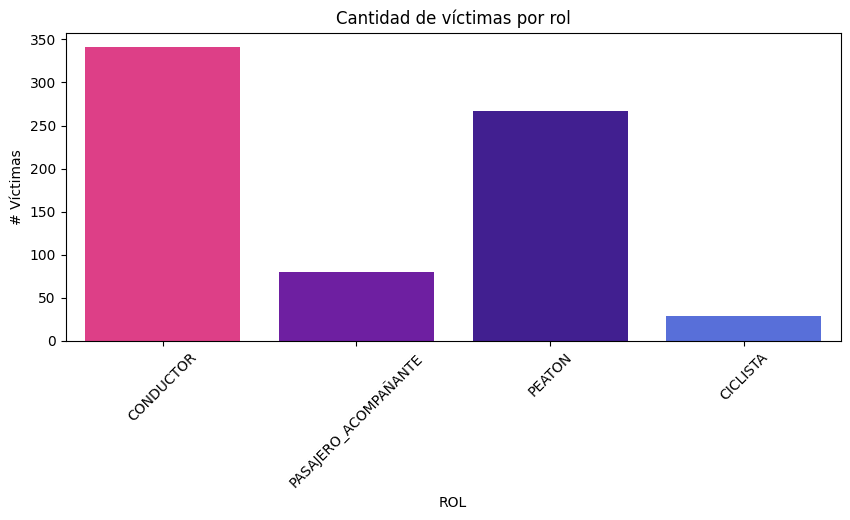

In [229]:
color = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]
fig, axes = plt.subplots(figsize=(10, 4))

sns.countplot(data=data, x='ROL', palette=color)
axes.set_title('Cantidad de víctimas por rol')
axes.set_ylabel('# Víctimas')
axes.tick_params(axis='x', rotation=45)

plt.show()


Los conductores encabezan la lista con 341 casos, señalando una preocupación destacada en términos de seguridad vial. Asimismo, la presencia de 29 víctimas entre los ciclistas destaca la vulnerabilidad de este grupo. Los pasajeros y peatones, con 80 y 267 víctimas respectivamente, subrayan la importancia de considerar la seguridad de todos los participantes en el tráfico. Estos datos ofrecen un punto de partida para futuros análisis detallados y la implementación de medidas específicas destinadas a mejorar la seguridad en el tránsito.

In [230]:
rol = data.groupby(['ROL', 'Victima']).size().reset_index(name='COUNT')
rol


,ROL,Victima,COUNT
0,CICLISTA,BICICLETA,29
1,CONDUCTOR,AUTO,65
2,CONDUCTOR,CARGAS,3
3,CONDUCTOR,MOTO,264
4,CONDUCTOR,MOVIL,1
5,CONDUCTOR,SD,8
6,PASAJERO_ACOMPAÑANTE,AUTO,27
7,PASAJERO_ACOMPAÑANTE,CARGAS,4
8,PASAJERO_ACOMPAÑANTE,MOTO,38
9,PASAJERO_ACOMPAÑANTE,MOVIL,2


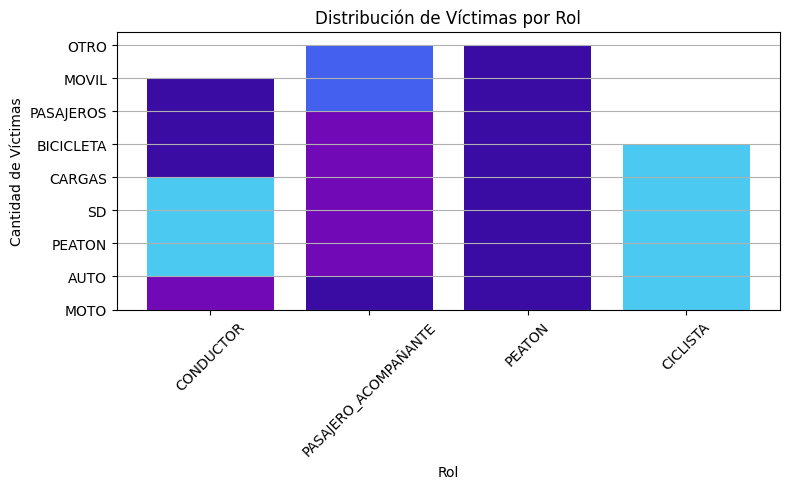

In [231]:
color = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]


plt.figure(figsize=(8, 5))
plt.bar(data['ROL'], data['Victima'], color=color)


plt.title('Distribución de Víctimas por Rol')
plt.xlabel('Rol')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45) 
plt.grid(axis='y')


plt.tight_layout() 
plt.show()

La tabla revela patrones notables en la distribución de víctimas según el rol y el tipo de vehículo involucrado en incidentes. Los conductores de motocicletas representan la categoría con mayor frecuencia de víctimas, totalizando 264, señalando la vulnerabilidad de este grupo. A su vez, los ciclistas y los peatones muestran cifras significativas, con 29 y 266 víctimas respectivamente, resaltando la importancia de la seguridad vial para estos participantes. Los accidentes que involucran a pasajeros de autos y motocicletas también presentan cifras considerables, subrayando la necesidad de enfoques específicos para mejorar la seguridad en estas situaciones

## **SEXO DE LAS VICTIMAS**

En esta sección, se busca examinar cómo el género se relaciona con la incidencia de accidentes

In [232]:
victimas_sexo = data.groupby('SEXO')['# Victimas'].count().reset_index()
victimas_sexo

,SEXO,# Victimas
0,FEMENINO,166
1,MASCULINO,551


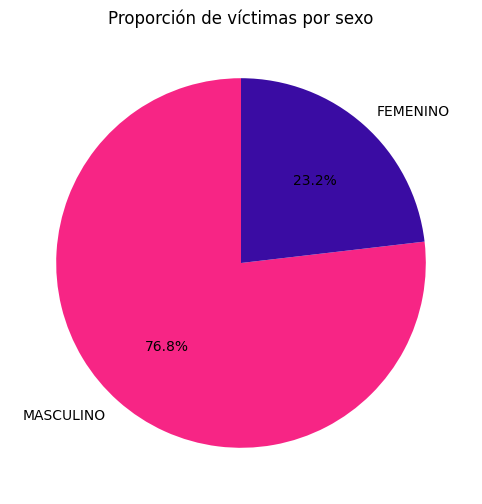

In [233]:
color = ["#F72585", "#3A0CA3", "#4361EE", "#4CC9F0"]



fig, axes = plt.subplots(1, 1, figsize=(10, 6))

sex_counts = data['SEXO'].value_counts()

# Creando el gráfico de torta
axes.pie(sex_counts, autopct='%1.1f%%', colors=color, labels=sex_counts.index, startangle=90)
axes.set_title('Proporción de víctimas por sexo')

plt.show()


La distribución por género en el DataFrame revela una disparidad significativa en el número de víctimas entre las categorías "FEMENINO" y "MASCULINO". Con 166 víctimas en la categoría "FEMENINO" y 545 en la categoría "MASCULINO", es evidente que el género masculino experimenta un número considerablemente mayor de incidentes. 

**CANTIDAD DE VICTIMAS EN EL ROL Y VICTIMA**

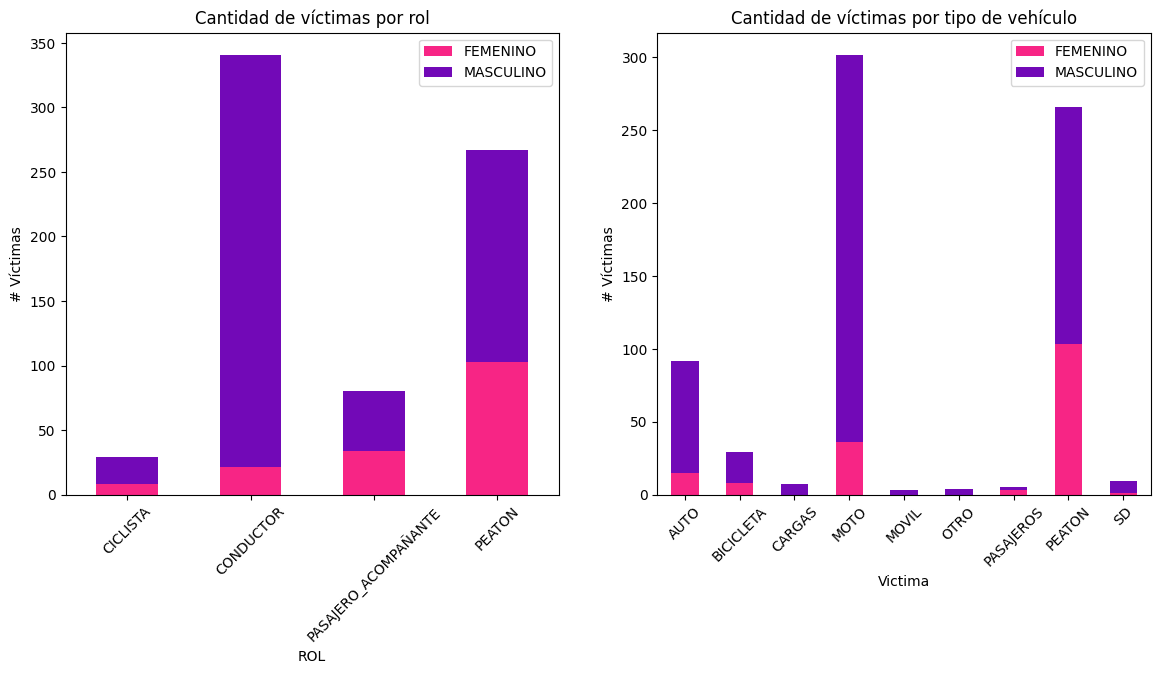

In [234]:
color = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

df_rol = data.groupby(['ROL', 'SEXO']).size().unstack(fill_value=0)
df_rol.plot(kind='bar', stacked=True, color=color, ax=axes[0], label=df_rol.columns)
axes[0].set_title('Cantidad de víctimas por rol')
axes[0].set_ylabel('# Víctimas')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

df_victima = data.groupby(['Victima', 'SEXO']).size().unstack(fill_value=0)
df_victima.plot(kind='bar', stacked=True, color=color, ax=axes[1], label=df_victima.columns)
axes[1].set_title('Cantidad de víctimas por tipo de vehículo')
axes[1].set_ylabel('# Víctimas')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.show()

La disparidad es notoria principalmente en la categoría de conductores, donde la mayoría son hombres. Destaca que las motocicletas son el tipo de vehículo con la mayor proporción de accidentes, y en este caso, la mayoría de los involucrados son hombres. También es llamativo que los peatones constituyen el grupo con la mayor cantidad de víctimas fatales en accidentes, con una proporción mayor de hombres, aunque la diferencia no es tan marcada.

## **EDAD DE LAS VICTIMAS**

En esta fase, nuestro objetivo es comprender cómo se distribuyen las edades de las víctimas. Los gráficos subsiguientes presentan un histograma y un boxplot, proporcionando una representación visual que nos permite analizar la dispersión y la tendencia central de estas edades.

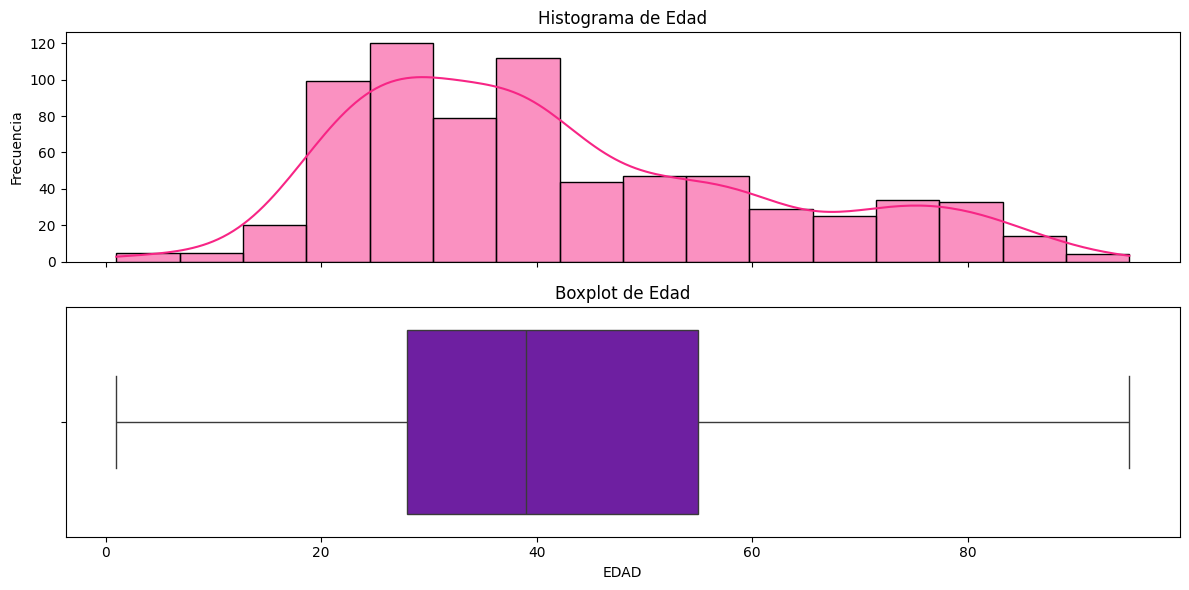

In [235]:
color = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]


fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
    
# Se grafica el histograma de la edad
sns.histplot(data['EDAD'], kde=True, ax=ax[0], color=color[0])
ax[0].set_title('Histograma de Edad') ; ax[0].set_ylabel('Frecuencia')
    
# Se grafica el boxplot de la edad
sns.boxplot(x=data['EDAD'], ax=ax[1], color=color[1])
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('EDAD')
      
plt.tight_layout()
plt.show()


En los gráficos previos, se resalta que el 75% de los individuos involucrados en accidentes poseen menos de 55 años, siendo la mediana de 39 años. No se encuentran presentes edades que puedan considerarse atípicas. A pesar de que se identifica un rango mínimo de 1 año y máximo de 95 años, es crucial destacar que estos datos comprenden a todas las víctimas, no necesariamente a aquellos que conducían en el momento del accidente. El histograma exhibe una distribución ligeramente sesgada hacia la derecha, indicando que la mayoría de los accidentes tienen lugar en el intervalo de edades comprendido entre 20 y 40 años.

**Distribucion de las edades por año**

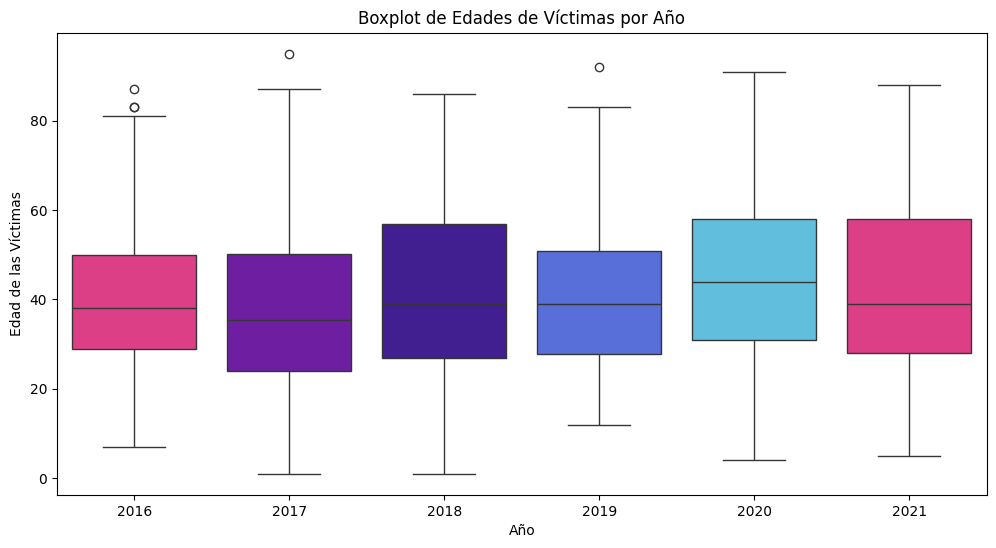

In [236]:
color = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

 # Se crea el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='EDAD', data=data, palette=color)
    
plt.title('Boxplot de Edades de Víctimas por Año') ; plt.xlabel('Año') ; plt.ylabel('Edad de las Víctimas')
  
plt.show()


En los distintos años registrados, las distribuciones de edades exhiben patrones bastante similares, destacándose una mediana cercana a los 40 años. Se identifican algunos valores atípicos que corresponden a adultos mayores afectados por accidentes, especialmente en los años 2016, 2017 y 2019.

**EDADES POR ROL**

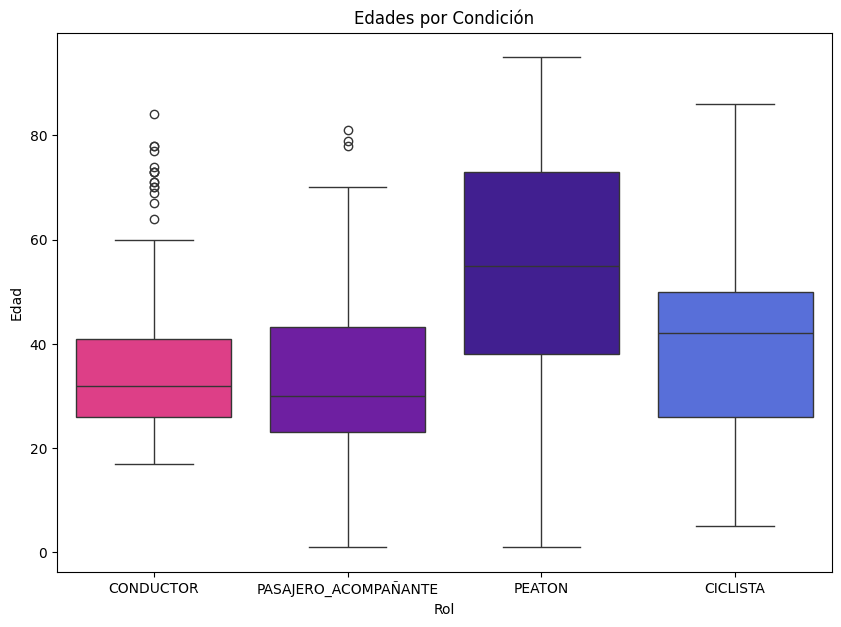

In [237]:
plt.figure(figsize=(10, 7))

sns.boxplot(x='ROL', y='EDAD', data=data, palette= color)
plt.title('Edades por Condición')
plt.xlabel('Rol')
plt.ylabel('Edad')

plt.show()

 Se evidencia que la edad mínima del conductor es aproximadamente 18 años, pero en los demás roles es posible encontrar víctimas de menor edad, lo cual está vinculado con niños que están siendo transportados. En cuanto a las edades promedio de los cuatro roles analizados, se destaca que la edad del conductor de automóvil y del pasajero es bastante similar, rondando los 35 años.
En el caso de los peatones, se observa una mayor dispersión en las edades, abarcando desde niños muy pequeños hasta adultos mayores cercanos a los 90 años. Aunque en los roles de conductor y pasajero acompañante se identifican algunos valores atípicos, estas edades son esperables y se consideran casos particulares dentro del conjunto de datos.

## **CANTIDAD DE VICTIMAS**

**Victimas por año y sexo**

In [238]:
data.groupby(["Año", 'SEXO'])["# Victimas"].sum().reset_index()


,Año,SEXO,# Victimas
0,2016,FEMENINO,27
1,2016,MASCULINO,123
2,2017,FEMENINO,38
3,2017,MASCULINO,122
4,2018,FEMENINO,41
5,2018,MASCULINO,120
6,2019,FEMENINO,27
7,2019,MASCULINO,79
8,2020,FEMENINO,18
9,2020,MASCULINO,69


Se evidencia una marcada disminución en el número de víctimas de 2018 a 2019, posiblemente atribuible a la pandemia de COVID, ya que coincide con esas fechas. Además, se observa que la tendencia de 2020 a 2021 es ascendente. Procedemos a ver la informacion en un grafico

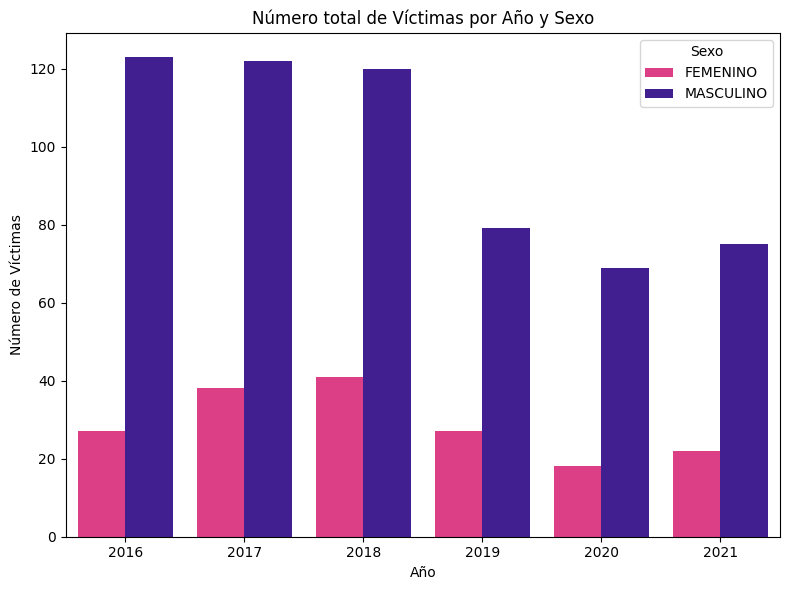

In [239]:
grouped = data.groupby(["Año", 'SEXO'])["# Victimas"].sum().reset_index()
color=["#F72585", "#3A0CA3"]

# Crear un gráfico de barras apiladas
plt.figure(figsize=(8, 6))
sns.barplot(x='Año', y='# Victimas', hue='SEXO', data=grouped, palette= color)

# Añadir etiquetas y título
plt.title('Número total de Víctimas por Año y Sexo')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.legend(title='Sexo')

plt.tight_layout()     
plt.show()



En el gráfico anterior, se evidencia que a lo largo de cada año, los hombres representan consistentemente un mayor número de víctimas en comparación con las mujeres. Además, se observa una disminución significativa en el número de víctimas tanto en hombres como en mujeres en 2019. Esta disminución podría estar relacionada con la pandemia por COVID, ya que coincide temporalmente con esas fechas. Por otro lado, se destaca un aumento en el número de víctimas femeninas entre 2016 y 2018. Estos patrones proporcionan insights valiosos sobre las variaciones en la incidencia de accidentes a lo largo del tiempo y sugieren posibles influencias externas, como eventos pandémicos.

**Distribucion mensual de  # Victimas mensual por año**

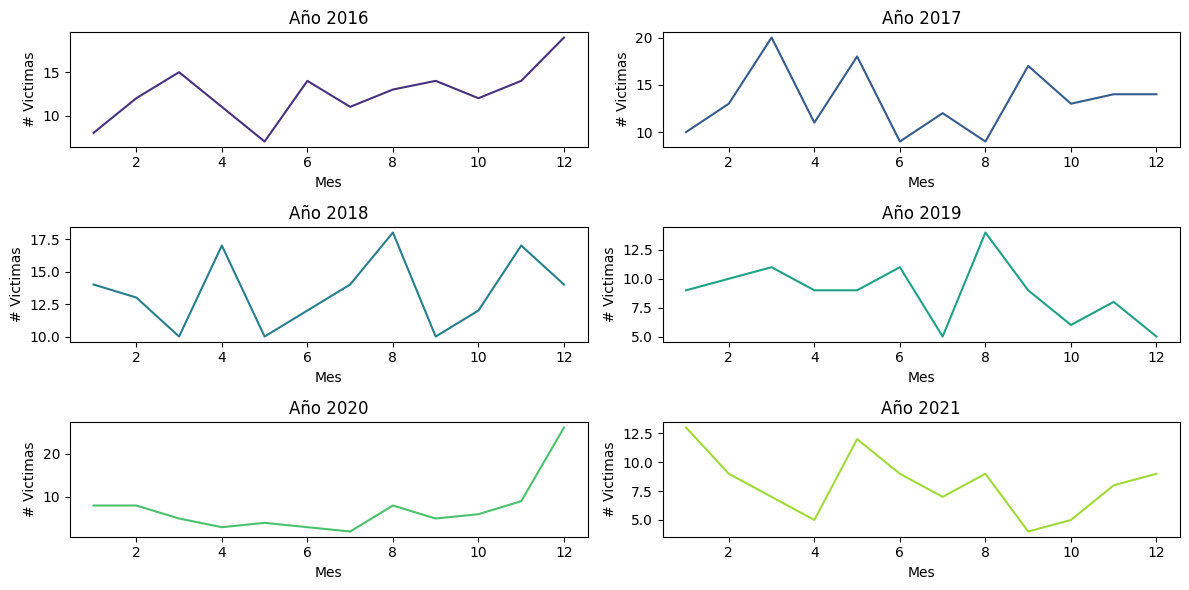

In [240]:
# Se obtiene una lista de años únicos
años = data['Año'].unique()

# Se define el número de filas y columnas para la cuadrícula de subgráficos
n_filas = 3
n_columnas = 2

# Se crea una figura con subgráficos en una cuadrícula de 2x3
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(12,6))

# Seleccionar una paleta de colores
colores = sns.color_palette("viridis", n_colors=len(años))

# Se itera a través de los años y crea un gráfico por año
for i, year in enumerate(años):
    fila = i // n_columnas
    columna = i % n_columnas
    
    # Se filtran los datos para el año actual y agrupa por mes
    data_mensual = (data[data['Año'] == year]
                    .groupby('Mes')
                    .agg({'# Victimas':'sum'}))
    
    # Se configura el subgráfico actual con colores
    ax = axes[fila, columna]
    data_mensual.plot(ax=ax, kind='line', color=colores[i])
    ax.set_title('Año ' + str(year)) ; ax.set_xlabel('Mes') ; ax.set_ylabel('# Victimas')
    ax.legend_ = None
plt.tight_layout()       
plt.show()


En las visualizaciones anteriores, no se identifica un patrón consistente a lo largo del año al comparar entre diferentes años. Los picos de accidentes fatales no parecen ocurrir en los mismos meses en los años registrados. Sin embargo, lo que resulta evidente es una marcada reducción en los accidentes fatales desde diciembre de 2019 hasta noviembre de 2020, un periodo que coincide con la implementación de medidas de cuarentena relacionadas con la pandemia de COVID-19.

**Cantidad de  Victimas mensual**

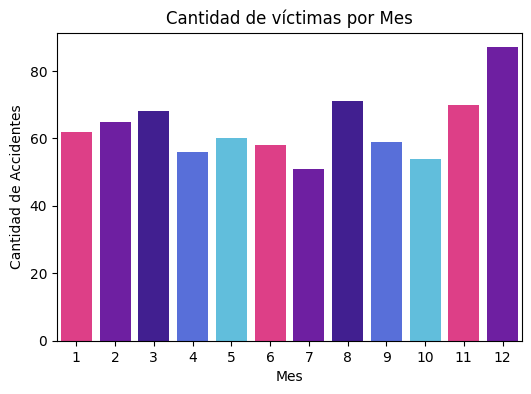

In [241]:
 # Se agrupa por la cantidad de víctimas por mes
datos = data.groupby('Mes').agg({'# Victimas':'sum'}).reset_index()
color = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

plt.figure(figsize=(6,4))
ax = sns.barplot(x='Mes', y='# Victimas', data=datos, palette= color)
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Accidentes')
    
plt.show()

Al analizar la distribución anual de todos los registros disponibles, se destaca un patrón consistente a lo largo del año: un aumento significativo de accidentes en el mes de diciembre. En general, los meses con la mayor cantidad de accidentes fatales son diciembre, noviembre y agosto. Por otro lado, julio y septiembre muestran la menor cantidad de accidentes fatales registrados. Este análisis proporciona insights valiosos sobre la variabilidad estacional en la frecuencia de accidentes a lo largo del año.

Ahodando un poco mas en los tiempos, verificamos la cantidad de accidentes por dias de la semana

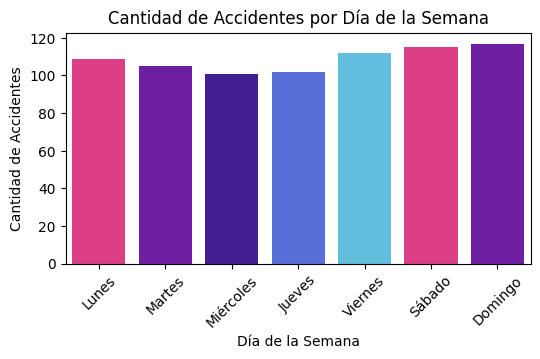

In [242]:
# Se convierte la columna 'fecha' a tipo de dato datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])
    
    # Se extrae el día de la semana (0 = lunes, 6 = domingo)
data['Día semana'] = data['Fecha'].dt.dayofweek

    # Se mapea el número del día de la semana a su nombre
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
data['Nombre día'] = data['Día semana'].map(lambda x: dias_semana[x])
 
    # Se cuenta la cantidad de accidentes por día de la semana
datos = data.groupby('Nombre día').agg({'# Victimas':'sum'}).reset_index()
      
    # Se crea el gráfico de barras
plt.figure(figsize=(6, 3))
ax = sns.barplot(x='Nombre día', y='# Victimas', data=datos, order=dias_semana, palette= color)
    
ax.set_title('Cantidad de Accidentes por Día de la Semana') ; ax.set_xlabel('Día de la Semana') ; ax.set_ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

Analizando la totalidad de los registros, se destaca que la distribución de accidentes muestra una concentración notable desde los viernes hasta los lunes, con el punto álgido registrado los sábados y el punto más bajo los miércoles. Este patrón sugiere una tendencia a la alza durante los fines de semana, con un ligero descenso a mediados de la semana.

## **Calle y cruces de los accidentes**

En esta seccion se busca observar en que tipo de calles se generan mas accidentes y si son en cruces o no

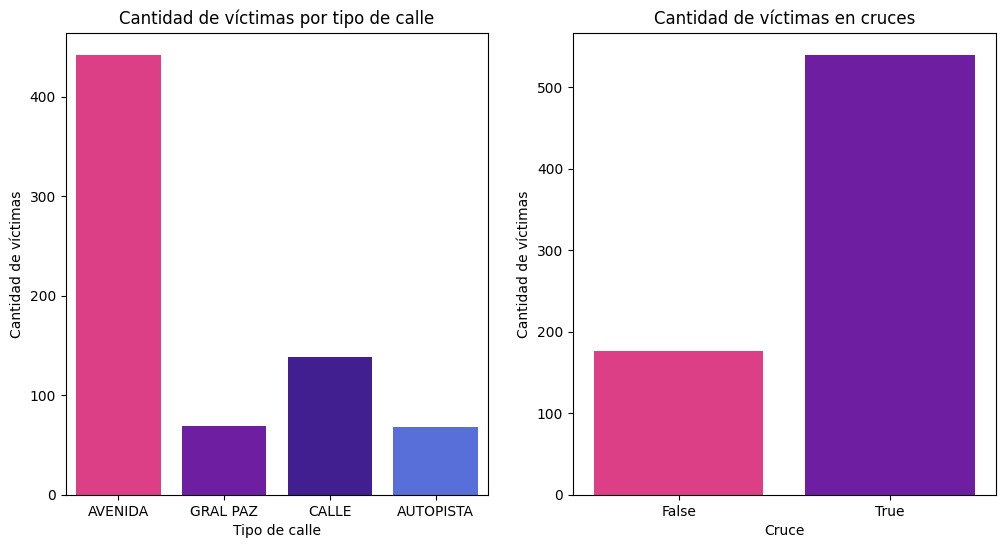

In [243]:
color = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=data, x='Tipo de calle', ax=axes[0], palette= color)
axes[0].set_title('Cantidad de víctimas por tipo de calle') ; axes[0].set_ylabel('Cantidad de víctimas')

sns.countplot(data=data, x='Cruce', ax=axes[1], palette= color)
axes[1].set_title('Cantidad de víctimas en cruces') ; axes[1].set_ylabel('Cantidad de víctimas')
    
  
plt.show()

El análisis detallado de los datos destaca que las "Avenidas" lideran con 442 víctimas, seguidas por las "Calles" con 138, mientras que las "Autopistas" y "Gral Paz" presentan cifras más bajas, con 68 y 69 víctimas respectivamente. Esto sugiere una conexión directa entre el tipo de vía y la seguridad vial. Además, en relación con el "Cruce", los incidentes con cruces registran un número significativamente mayor de víctimas (540) en comparación con los casos sin cruces (177), subrayando la necesidad urgente de medidas específicas para reducir el riesgo y minimizar el impacto en términos de víctimas.

## **Victimas por Comuna**

Se evalua en que comuna se presenta mayor numero de accidentes

In [244]:
data.groupby(["Comuna"])["# Victimas"].sum().reset_index()

,Comuna,# Victimas
0,0,2
1,1,101
2,2,25
3,3,48
4,4,85
5,5,22
6,6,24
7,7,66
8,8,71
9,9,79


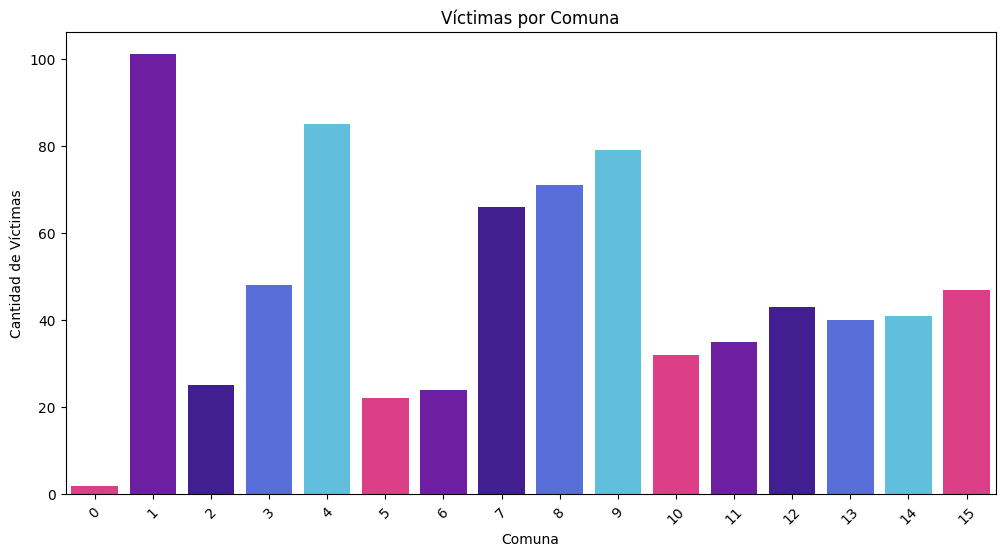

In [245]:
color = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

victima_comuna = data.groupby("Comuna")["# Victimas"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=victima_comuna, x="Comuna", y="# Victimas", palette=color)
plt.title("Víctimas por Comuna")
plt.xlabel("Comuna")
plt.ylabel("Cantidad de Víctimas")
plt.xticks(rotation=45)

plt.show()

La presencia de la comuna "0" con dos víctimas podría sugerir un posible error de digitación, ya que comúnmente las comunas suelen numerarse a partir de "1". Sin embargo, dado que estos dos datos representan una proporción insignificante en comparación con el conjunto total y no afectan significativamente el estudio, se opta por ignorar la comuna "0" en el análisis. La Comuna 1 destaca con la cifra más alta de 101 víctimas, señalando la posibilidad de desafíos particulares en términos de seguridad vial. Estos datos ofrecen una valiosa oportunidad para evaluar la efectividad de las políticas de seguridad vial en cada comuna y destacan la importancia de identificar áreas específicas que puedan requerir medidas de prevención adicionales. SEguida de las comunas 4, 7 ,8 y 9 como las comunas con mas accidentes

## **Participantes y Victima**

In [256]:
grupo = data.groupby(['Participantes', 'Victima']).size().reset_index(name='COUNT')
grupo

,Participantes,Victima,COUNT
0,AUTO-AUTO,AUTO,33
1,AUTO-CARGAS,AUTO,15
2,AUTO-MOVIL,AUTO,1
3,AUTO-OBJETO FIJO,AUTO,26
4,AUTO-OBJETO FIJO,OTRO,2
5,AUTO-PASAJEROS,AUTO,10
6,AUTO-SD,AUTO,4
7,BICICLETA-AUTO,BICICLETA,8
8,BICICLETA-CARGAS,BICICLETA,10
9,BICICLETA-OTRO,BICICLETA,1


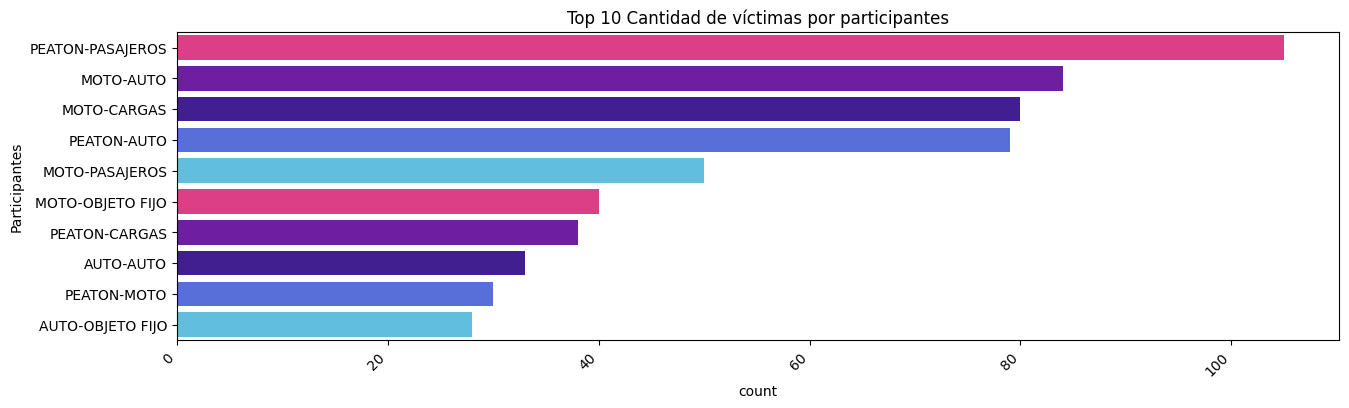

In [253]:
participantes= data['Participantes'].value_counts().reset_index().head(10)
participantes = participantes.rename(columns={'Cantidad': 'participantes'})
participantes = participantes.sort_values(by='count', ascending=False)

plt.figure(figsize=(15, 4))
   
ax = sns.barplot(data=participantes, x='count', y= 'Participantes', order=participantes['Participantes'], palette=color)
ax.set_title('Top 10 Cantidad de víctimas por participantes')
ax.set_ylabel('Participantes')
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()



El análisis de participantes en accidentes revela patrones significativos, destacando que los peatones y pasajeros representan la categoría con mayor frecuencia, totalizando 105 casos. Las interacciones entre motocicletas y automóviles también son prominentes, con 84 incidentes de moto-auto y 50 de moto-pasajeros. La incidencia de accidentes involucrando motocicletas y cargas es también notable, con 80 casos. Los resultados sugieren la importancia de abordar medidas de seguridad específicas para peatones, pasajeros y usuarios de motocicletas. Este análisis proporciona una base valiosa para desarrollar estrategias de prevención enfocadas en reducir la frecuencia y gravedad de accidentes, priorizando intervenciones dirigidas a las dinámicas de tráfico específicas que involucran a estos participantes.

## **Acusados**

In [258]:
acusados = data['Acusado'].value_counts().reset_index()
acusados = acusados.rename(columns={'Cantidad': 'Acusado'})
acusados= acusados.sort_values(by='count', ascending=False)
acusados

,Acusado,count
0,AUTO,210
1,PASAJEROS,178
2,CARGAS,150
3,OBJETO FIJO,67
4,MOTO,58
5,SD,23
6,MULTIPLE,17
7,BICICLETA,7
8,OTRO,6
9,TREN,1


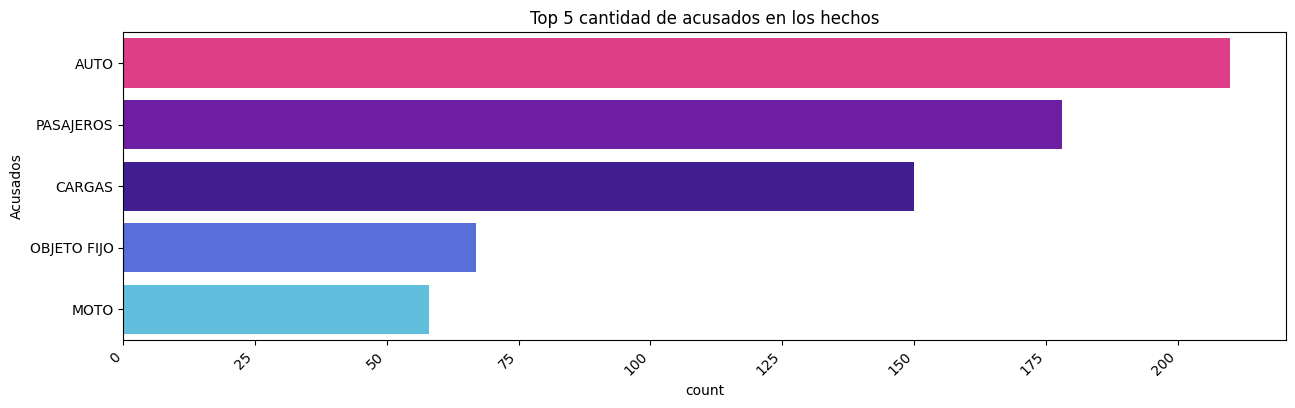

In [261]:
acusados = data['Acusado'].value_counts().reset_index().head(5)
    
plt.figure(figsize=(15, 4))
    

ax = sns.barplot(data=acusados, x='count', y='Acusado', order=acusados['Acusado'], palette=color)
ax.set_title('Top 5 cantidad de acusados en los hechos') ; ax.set_ylabel('Acusados') 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

El análisis de los acusados en accidentes revela una distribución significativa en las categorías, destacando los automóviles como la principal causa, totalizando 210 casos. Los pasajeros y vehículos de carga también presentan una frecuencia notable, con 178 y 150 casos respectivamente. Los accidentes relacionados con objetos fijos alcanzan 67 casos, mientras que las motocicletas y vehículos sin detalles específicos (SD) también contribuyen con 58 y 23 casos respectivamente. Los resultados subrayan la importancia de abordar las conductas y condiciones asociadas con los diferentes tipos de acusados, sugiriendo la necesidad de medidas de seguridad específicas para automóviles, pasajeros, cargas y motocicletas. 

# Exportacion del dataset

In [262]:
data.to_csv('Homicidios.csv',index=False, encoding='utf-8')
print(f'Se guardó el archivo ')

Se guardó el archivo 
